#Tokenization using Spacy


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
text = "Mobile phone is good but the camera is not."

In [ ]:
doc = nlp(text)

In [ ]:
for i in doc:
  print(i)

Mobile
phone
is
good
but
the
camera
is
not
.


#Stop Words Removal

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
len(STOP_WORDS)

326

In [ ]:
print(STOP_WORDS)

{'not', 'the', 'using', 'such', 'every', 'please', 'serious', 'along', 'were', 'which', 'could', 'a', 'off', 'something', 'being', 'either', 'without', 'unless', 'myself', 'several', 'each', 'never', 'none', 'at', 'yourself', 're', '‘d', 'since', 'its', 'twenty', '’s', 'due', 'nine', 'somewhere', 'seemed', 'moreover', 'whom', 'yours', 'here', 'next', 'by', 'ourselves', 'as', 'some', 'take', 'another', 'five', 'only', 'well', 'i', 'front', 'over', 'very', 'top', 'still', 'except', 'their', 'had', 'nor', 'enough', 'those', "'ve", 'but', 'two', 'all', 'anything', 'about', 'hers', 'us', 'bottom', 'empty', 'first', 'thru', 'anyway', 'are', 'rather', 'eight', 'make', 'also', 'these', 'someone', 'your', 'back', 'whence', 'hereby', 'latter', "'s", 'when', 'sixty', 'her', 'so', 'is', 'keep', 'his', 'does', 'what', 'anyhow', 'fifty', 'was', 'out', 'or', 'in', 'while', 'becomes', 'together', 'otherwise', 'just', 'until', 'whole', 'than', 'you', 'more', "'re", 'sometimes', 'nowhere', 'although', '

In [ ]:
text = "Mobile phone is good but the camera is not."

In [ ]:
for i in doc:
  if i.is_stop != True and i.is_punct != True:
    print(i)

Mobile
phone
good
camera


#Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
text = "Mobile phone is good but the camera is not."

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit([text])

CountVectorizer()

In [ ]:
print(vectorizer.vocabulary_)

{'mobile': 4, 'phone': 6, 'is': 3, 'good': 2, 'but': 0, 'the': 7, 'camera': 1, 'not': 5}


In [ ]:
print(vectorizer.transform([text]))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1


## Actual stuff

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

# for doc operations
import gensim 

import pandas as pd
from gensim import corpora

# reg ex
import re

In [ ]:
nlp.vocab['star'].is_stop = True
nlp.vocab['stars'].is_stop = True
nlp.vocab['good'].is_stop = True

In [ ]:
#pandas
reviews = pd.read_csv('flipkart_ratings_2.csv')

In [ ]:
reviews.shape
reviews

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,Good,5
9972,Everything is amazimg but the built is very li...,5
9973,Good,5
9974,Best headphone i have ever used....,5


In [ ]:
#pandas
reviews['rating'] = reviews['rating'].apply(lambda x:1 if x > 4 else 0)
reviews

,review,rating
0,It was nice produt. I like it's design a lot. ...,1
1,awesome sound....very pretty to see this nd th...,1
2,awesome sound quality. pros 7-8 hrs of battery...,0
3,I think it is such a good product not only as ...,1
4,awesome bass sound quality very good bettary l...,1
...,...,...
9971,Good,1
9972,Everything is amazimg but the built is very li...,1
9973,Good,1
9974,Best headphone i have ever used....,1


In [ ]:
#pandas
negative_sentiments = reviews[reviews['rating'] == 0]
print(negative_sentiments.shape[0])
negative_sentiments

4250


,review,rating
2,awesome sound quality. pros 7-8 hrs of battery...,0
6,This product sound is clear and excellent bass...,0
7,Should u buy this---Pros:-1. Sound quality and...,0
10,The headphone have the best bass and perfect t...,0
11,great looks n very light weight sound is very ...,0
...,...,...
9963,"mic dnt wrk properly, other wise decent product",0
9965,good headphone,0
9966,Awesome product,0
9967,Bad product.,0


In [ ]:
#pandas
negative_sentiments = negative_sentiments.dropna()

In [ ]:
#tokenization, stop words removal

negative_sentiments['Final Text'] = ''
for i in range(negative_sentiments.shape[0]):
    temp = []
    document = nlp(negative_sentiments['review'].iloc[i].lower())
    for j in document:
        if j.is_stop!=True and j.is_punct!=True:
            temp.append(j.lemma_)
    negative_sentiments['Final Text'].iloc[i] = temp


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#vectoriazation and topic modeling 

def topic_modelling(text):
    # table to dictionary
    dictionary = corpora.Dictionary(text)
    # document to bag of words
    doc_term_matrix = [dictionary.doc2bow(rev) for rev in text]
    # Latent Dirichlet Model - for topic modelling
    LDA = gensim.models.ldamodel.LdaModel
    lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, 
                    num_topics = 1, random_state = 19, passes = 50)
    
    temp = re.findall('[a-z]*',lda_model.print_topics()[0][1])
    tags = [x for x in temp if x]
    return tags

In [ ]:
#pandas
negative_sentiments['Final Text'] = negative_sentiments['Final Text'].apply(lambda x:' '.join(x))
negative_sentiments.head(2)

,review,rating,Final Text
2,awesome sound quality. pros 7-8 hrs of battery...,0,awesome sound quality pro 7 8 hrs battery life...
6,This product sound is clear and excellent bass...,0,product sound clear excellent bass obviously p...


In [ ]:
#pandas
negative_sentiments['Review Tags'] = negative_sentiments['Final Text'].apply(lambda x: topic_modelling([x.split(' ')]))
negative_sentiments.head(2)

,review,rating,Final Text,Review Tags
2,awesome sound quality. pros 7-8 hrs of battery...,0,awesome sound quality pro 7 8 hrs battery life...,"[sound, tight, equaliser, mm, ok, output, ll, ..."
6,This product sound is clear and excellent bass...,0,product sound clear excellent bass obviously p...,"[product, bass, clear, daut, excellent, guy, m..."


In [ ]:
from functools import reduce

final_list = reduce(lambda x,y :x+y ,negative_sentiments['Review Tags'].dropna().values.tolist())
final_list

['sound',
 'tight',
 'equaliser',
 'mm',
 'ok',
 'output',
 'll',
 'mention',
 'quality',
 'min',
 'product',
 'bass',
 'clear',
 'daut',
 'excellent',
 'guy',
 'money',
 'obviously',
 'sound',
 'valuable',
 'u',
 'ear',
 'quality',
 'use',
 'headphone',
 'bass',
 'sound',
 'moto',
 'opinion',
 'if',
 'need',
 'bluetooth',
 'mi',
 'headphone',
 'wire',
 'range',
 'provide',
 'perfect',
 'mic',
 'a',
 'large',
 'n',
 'ear',
 'ok',
 'sound',
 'quality',
 'pain',
 'poor',
 'price',
 'money',
 'value',
 'ear',
 'somebody',
 'sound',
 'size',
 'small',
 'quality',
 'sooo',
 'start',
 'pain',
 'uncomfortable',
 'play',
 'sound',
 'throw',
 'hear',
 'headphone',
 'like',
 'wear',
 'volume',
 'quality',
 'usually',
 'use',
 'comfortable',
 'yes',
 'head',
 'mic',
 'quality',
 'mid',
 'music',
 'person',
 'talk',
 'battery',
 'sound',
 'day',
 'headphone',
 'relay',
 'product',
 'rate',
 'phone',
 'service',
 'battery',
 'product',
 'r',
 'rock',
 'speaker',
 'observeve',
 'price',
 'reasaonble

In [ ]:
dic = {}
for i in final_list:
    if i not in dic.keys():
        dic[i] = 1
    else:
        dic[i] = dic[i] + 1

In [ ]:
#pandas
df = pd.Series(dic)
df = df.drop(['t','s'])
df = df.sort_values(ascending = False)
df.head(20)

product      1211
sound        1117
quality      1069
nice          524
ear           437
headphone     413
bass          382
price         354
pain          297
use           263
buy           262
bad           258
work          249
bluetooth     236
range         218
tight         210
good          208
time          207
awesome       197
mic           189
dtype: int64

In [ ]:
#data visualization, matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


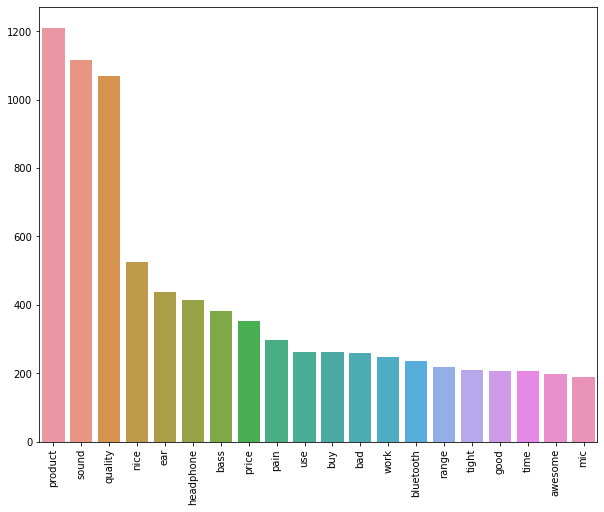

In [ ]:
#data visualization, matplotlib & seaborn
fig = plt.figure(figsize = (10,8))
sns.barplot(df.head(20).index.values.tolist(), df.head(20).values.tolist())
plt.xticks(rotation = 90)
plt.show()